## PROYECTO DE ANALISIS DE ALGORITMOS.  ENTREGA FINAL


### Orlando Abaunza Ubaque
### Pablo Robayo

### 1. Cliques en Grafos

##### Primero se calcula la distancia de hamming, para despues mediante la funcion find_cliques(G) de la libreria "networkx" calcular el numero de cliques en el grafo de hamming H.


In [133]:
import networkx
import itertools
import logging
import time
import math
import numpy as np
import pylab as pl


def hamming(tam, d):
    H = networkx.Graph()
    l = ["01"] * tam 
    nodes = itertools.product(*l)
    nodes = [''.join(x) for x in nodes]
    H.add_nodes_from(nodes) 
    
    for node in H.nodes():        
        for v in H.nodes():
            if(v != node):
                dist = h_distance(node, v)
                if(dist >= d):
                    H.add_edge(node,v)
    
    return H

def h_distance(str1, str2):        
        distance = 0
        for ch1, ch2 in zip(str1, str2):
                if ch1 != ch2:
                        distance += 1
        return distance
    
def mutate_node(node, n):
    if node[n] == '0':
        base = '1'
    else:
        base = '0'
    new_node = node[0:n] + base + node[n+1:]
    return new_node


H = hamming(3,1)

print ("Cliques: ",list(networkx.find_cliques(H))) 
print ("# de Cliques: " ,networkx.graph_clique_number(H))

Cliques:  [['011', '100', '101', '001', '110', '000', '111', '010']]
# de Cliques:  8


#### Analisis 

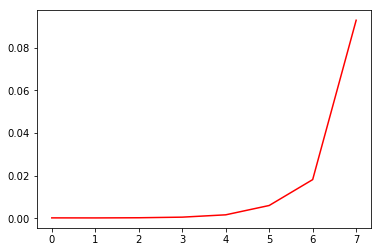

In [78]:
def exper_analys(A):
    R = []
    for i in range(N):
        tic = time.clock()
        H = hamming(i,10)
        networkx.graph_clique_number(H)
        toc = time.clock()
        R.append(toc - tic)
    return R

N = 8
pl.clf()
x = np.arange(N)
y = np.array(exper_analys(N))
pl.plot(x, y, '-r')
pl.show()

### 2. MST Arbol de minima expansión
##### Primero ordenamos las aristas del grafo de forma ascendente. A partir de la lista de dichas aristas crearemos el arbol de minima expansión (MST)
##### Tiene un tiempo de ejecucion asintotico del orden O(2nm^2)

In [28]:
def open_file(fileName):
    lines = [line.rstrip('\n') for line in open(fileName)]
    N = int(lines[0])
    K = int(lines[1])
    L = []
    
    i = 0
    for l in lines[2:]:
        t = l.split(',',N - i)
        i -= 1
        q = (i * -1) - 1
        for j in t:
            if(j != "Inf"):
                tokens = j.split('/',1)
                u = ((i * -1) - 1)
                L.append((u,q, int(tokens[0]) , tokens[1]))
            q+=1
    return N, K, L

In [24]:

        
def ordena(l):
    for c in range(1,len(l)):
        for x in range(len(l)-1):
            if l[x].peso>l[x+1].peso:
                aux=l[x]
                l[x]=l[x+1]
                l[x+1]=aux
class arista:
    def __init__(self,origen,destino,color,peso):
        self.origen=origen
        self.destino=destino
        self.color=color
        self.peso=peso
        
def OrderEdge(graph):
    lis=[]
    repetido=[]
    for u in graph:
        origen=u
        for v in graph[u]:
            destino=v
            for x in graph[u][v]:
                if(x=='R' or x=='B'):
                    color=x
                else:
                    peso=x
            if(not destino in repetido):        
                a=arista(origen,destino,color,peso)
                lis.append(a)
        repetido.append(origen)
    ordena(lis)
    return lis

In [25]:
def MST(lista,k,n):
    azules=k
    rojas=n-k-1
    cblue=0
    cred=0
    resp=[]
    valor=0
    print("K:",k)
    print("n-k-1:",rojas)
    for i in lista:
        introducir=False
        if(i.color=='R'):
            if(cred<rojas):
                introducir=True
                cred=cred+1
        elif(i.color=='B'):
            if(cblue<azules):
                introducir=True
                cblue=cblue+1
        if(introducir):
            arbol={i.origen:{i.destino: i.color}}
            resp.append(arbol)
            valor=valor+i.peso
    print("Peso: ",valor)
    print("Aristas Azules: ",cblue)
    print("Aristas Rojas: ",cred)
    return resp;


In [26]:
graph,nod,color=open_file("input_n8_b5_r2")
aristas=OrderEdge(graph)
print (MST(aristas,color,nod))

K: 5
n-k-1: 2
Peso:  22
Aristas Azules:  5
Aristas Rojas:  2
[{1: {5: 'R'}}, {6: {7: 'B'}}, {1: {2: 'R'}}, {1: {3: 'B'}}, {0: {4: 'B'}}, {2: {6: 'B'}}, {2: {4: 'B'}}]


In [27]:
graph,nod,color=open_file("input_n8_b4_r3")
aristas=OrderEdge(graph)
print (MST(aristas,color,nod))

K: 4
n-k-1: 3
Peso:  21
Aristas Azules:  4
Aristas Rojas:  3
[{1: {5: 'R'}}, {6: {7: 'B'}}, {1: {2: 'R'}}, {1: {3: 'B'}}, {0: {4: 'B'}}, {2: {6: 'B'}}, {0: {2: 'R'}}]


# 3. Problema LP

Suponga que se planea contruir una nueva cadena de tiendas en una ciudad dada, usted tiene identificado una serie de ubicaciones potenciales en diferentes barrios. Además asuma que la demanda de productos en cada barrio de la ciudad es conocida. Si usted quiere construir exactamente k tiendas, ¿dónde debería localizarlas de forma que minimice la distancia promedio de los clientes? ¿Si en lugar usted dese construir una cantidad variable de tiendas, y el costo de construir una tienda en cada sitio es conocido, ¿dónde debería construir las tiendas de forma que minimice el costo total del construcción y la distancia promedio de los clientes?

In [11]:
import math
import numpy as np
import pylab as pl
import random as rnd
import time
from collections import defaultdict
import itertools
%matplotlib inline

In [45]:
class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}

    def add_node(self, value):
        self.nodes.add(value)

    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.distances[(from_node, to_node)] = distance
        self.distances[(to_node, from_node)] = distance
        
    def keys(self):
        keys = []
        for node in self.nodes:
            keys.append(node.name)
        return keys



class Barrio:
    def __init__(self):
        self.name = ''
        self.costoTienda = 0
        
    def __init__(self, name, costoTienda):
        self.name = name
        self.costoTienda = costoTienda
        
    def __str__(self):
        return self.name
    
    def __repr__(self):
        return self.name



def printGraph(g):
    sortedNodes = sorted(g.nodes, key=lambda node: node.name) # sort by name
    for node in sortedNodes:
        print(node.name + ")")
        for edge in g.edges[node]:
            print(edge)
            print(g.distances[node,edge])

def floyd_warshall(g):
    #Creating adjacence matrix
    m = [[float('inf')] * len(g.nodes) for i in range(len(g.nodes))]
    sortedNodes = sorted(g.nodes, key=lambda node: node.name) # sort by name
    for i, x in enumerate(sortedNodes):
        for j, y in enumerate(sortedNodes):
            if x == y:
                m[i][j] = 0
            else:
                if x in g.edges[y]:
                    m[i][j] = g.distances[(x,y)]

    #FloydWarshall
    for k in range(len(sortedNodes)):
        for i in range(len(sortedNodes)):
            for j in range(len(sortedNodes)):
                m[i][j] = min(m[i][j], m[i][k] + m[k][j])
    return m

def adj(g):
    #Creating adjacence matrix
    m = [[float('inf')] * len(g.nodes) for i in range(len(g.nodes))]
    sortedNodes = sorted(g.nodes, key=lambda node: node.name) # sort by name
    for i, x in enumerate(sortedNodes):
        for j, y in enumerate(sortedNodes):
            if x == y:
                m[i][j] = 0
            else:
                if x in g.edges[y]:
                    m[i][j] = g.distances[(x,y)]
    
    return m

def sumArray(a):
    sums = 0
    for element in a:
        sums += element
    return sums

# Sin costos

In [46]:
def CargarGrafo(filename):
    file = open(filename, "r") 
    k = int(file.readline())    
    line = file.readline()
    values = line.split()
    graph = Graph()
    
    barrios = []
    while line:
        barrio = Barrio(values[0], 0)
        barrios.append(barrio)
        graph.add_node(barrio)
        
        for i in range(1, len(values)):
            index = i-1
            sortedNodes = sorted(graph.nodes, key=lambda node: node.name) # sort by name
            if len(sortedNodes) > index:
                barrio2 = sortedNodes[index]
                if barrio != barrio2:
                    graph.add_edge(barrio, barrio2, int(values[i]))
                
        line = file.readline()
        values = line.split()
    
    file.close
    
    return graph, k

In [47]:
def sincosto(filename):
    #Create graph
    g, k = CargarGrafo(filename)
    #Create matrix of min distances
    adj_matrix = adj(g)
    matrix = floyd_warshall(g)

    sortedNodes = sorted(g.nodes, key=lambda node: node.name) # sort by name
    #Getting combinations
    combinations = itertools.combinations(sortedNodes, k)
    combinationsList = [list(x) for x in combinations]

    minCombination = []
    minDistance = 10000

    for i in range(len(combinationsList)):
        combination = combinationsList[i]
        distances = np.tile(10000, len(sortedNodes))
        for node in combination:
            row = adj_matrix[sortedNodes.index(node)]
            for j in range(len(distances)):
                if distances[j] > row[j]:
                    distances[j] = row[j]
            if sumArray(distances) <= minDistance:
                minDistance = sumArray(distances)
                minCombination = combination

    stores = ""
    for i in range(len(minCombination)):
        stores += minCombination[i].name
        if i != len(minCombination)-1:
            stores += ","

    print(minDistance)
    print(stores)

In [48]:
sincosto("input_n5_k1")

28
A


In [49]:
sincosto("input_n5_k2")

8
A,C


In [50]:
sincosto("input_n5_k3")

2
B,C,D


# Con costos

In [51]:


def loadGraphWithCostsFrom(filename):
    file = open(filename, "r") 
    k = int(file.readline())    
    line = file.readline()
    values = line.split()
    graph = Graph()
    
    barrios = []
    while line:
        barrio = Barrio(values[0], int(values[1]))
        barrios.append(barrio)
        graph.add_node(barrio)
        
        for i in range(2, len(values)):
            index = i-2
            sortedNodes = sorted(graph.nodes, key=lambda node: node.name) # sort by name
            if len(sortedNodes) > index:
                barrio2 = sortedNodes[index]
                if barrio != barrio2:
                    graph.add_edge(barrio, barrio2, int(values[i]))
                
        line = file.readline()
        values = line.split()
    
    file.close
    
    return graph, k



In [52]:
def concosto(filename):
    #Create graph
    g, k = loadGraphWithCostsFrom(filename)
    #Create matrix of min distances
    adj_matrix = adj(g)
    matrix = floyd_warshall(g)

    sortedNodes = sorted(g.nodes, key=lambda node: node.name) # sort by name
    #Getting combinations
    combinations = itertools.combinations(sortedNodes, k)
    combinationsList = [list(x) for x in combinations]

    minCombination = []
    minDistanceAndCost = 10000
    for i in range(len(combinationsList)):
        combination = combinationsList[i]
        distances = np.tile(10000, len(sortedNodes))
        cost  = 0
        for node in combination:
            cost += node.costoTienda
            
        for node in combination:
            row = adj_matrix[sortedNodes.index(node)]
            for j in range(len(distances)):
                if distances[j] > row[j]:
                    distances[j] = row[j]
            if (sumArray(distances) + cost) <= minDistanceAndCost:                  
                minDistanceAndCost = sumArray(distances) + cost
                minCombination = combination

    stores = ""
    for i in range(len(minCombination)):
        stores += minCombination[i].name
        if i != len(minCombination)-1:
            stores += ","

    print(minDistanceAndCost)
    print(stores)

In [53]:
concosto("input_n5_k1_c")

50
B


In [54]:
concosto("input_n5_k2_c")

40
B,D


In [55]:
concosto("input_n5_k3_c")

51
B,C,D
